In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
train_df=pd.read_csv("C:\\Users\\ayush\\mnist_train_small.csv",  header = None, prefix="var")
test_df=pd.read_csv("C:\\Users\\ayush\\mnist_test.csv",  header = None, prefix="var")

In [20]:
train_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var775,var776,var777,var778,var779,var780,var781,var782,var783,var784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var775,var776,var777,var778,var779,var780,var781,var782,var783,var784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x_train=train_df.drop(['var0'], axis=1).values
x_bias_train=np.ones((np.shape(x1)[0], 1))
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
y1=train_df['var0']
y_train=y1.to_numpy()
y_train=np.vstack(y_train)
print((y_train))

[[6]
 [5]
 [7]
 ...
 [2]
 [9]
 [5]]


In [24]:
train_df.shape

(20000, 785)

In [25]:
print(x_train.shape)
print(y_train.shape)

(20000, 784)
(20000, 1)


In [34]:
def model(x_train,x_bias_train, y_train, alpha, iterations):
    m=y_train.size
    theta=np.zeros((784,1))
    cost_list=[] 
    theta_bias=0
    for i in range(0,iterations):
        y_pred=np.dot(x_train, theta)+x_bias_train*theta_bias
        
        cost=(1/(2*m))*np.sum((y_pred-y_train)**2)
        d_theta_bias=(1/m)*np.dot(x_bias_train.T,y_pred-y_train)
        d_theta=(1/m)*np.dot(x_train.T, y_pred-y_train)
        
        theta=theta-alpha*d_theta
        theta_bias=theta_bias-alpha*d_theta_bias    
        cost_list.append(cost)
        
    return theta, cost_list,theta_bias

In [35]:
iterations=10000
alpha=0.0000005
theta, cost_list,theta_bias=model(x_train,x_bias_train, y_train, alpha=alpha, iterations=iterations)

In [44]:
x_test=test_df.drop(['var0'], axis=1).values
x_test_bias=np.ones((np.shape(x_test)[0], 1))
print(x_test)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
y2=test_df['var0']
y_test=y2.to_numpy()
y_test=np.vstack(y_test)
print(y_test)

[[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]


In [46]:

print(cost_list)

[14.17515, 4.742231495333608, 3.86423730457278, 3.5479390722373267, 3.3228605472177613, 3.1482434897225016, 3.0110657973785275, 2.902473279927025, 2.815808480489893, 2.7460186769890074, 2.6892607884425526, 2.642606676472797, 2.6038211610304782, 2.5711945363634015, 2.54341607612578, 2.5194783992304464, 2.4986050919934004, 2.4801958720186037, 2.463784995816653, 2.4490096747701933, 2.435586061830233, 2.4232909707558914, 2.411947940484204, 2.401416596488862, 2.391584516556696, 2.3823610010957914, 2.3736722934903667, 2.3654579058356977, 2.357667788404316, 2.3502601440101105, 2.343199736010302, 2.3364565747487944, 2.330004894609187, 2.323822354630026, 2.3178894114370197, 2.3121888252733713, 2.306705269071872, 2.3014250175005113, 2.29633569824905, 2.291426091902701, 2.2866859698706885, 2.282105962229608, 2.277677449177045, 2.273392471201375, 2.269243654159093, 2.2652241462876064, 2.261327564827369, 2.2575479504268463, 2.253879727891001, 2.250317672134723, 2.246856878436717, 2.2434927362720756

In [47]:
y_pred=np.dot(x_test, theta)+x_test_bias*theta_bias
print(y_pred)

[[5.55758743]
 [1.9633549 ]
 [0.84568515]
 ...
 [8.65267774]
 [5.8562656 ]
 [6.9063384 ]]


In [48]:
g=np.sum(np.square(y_test-y_pred))
y=np.sum(np.square(y_test-np.mean(y_test)))

In [49]:
print("r2 calculated is:", (1-(g/y)))

r2 calculated is: 0.5724132346921863


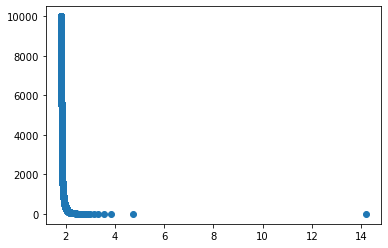

In [50]:
iterations_list=[int(x) for x in range(1,iterations+1,1)]
plt.scatter(cost_list, iterations_list)